In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
df=pd.read_csv(r"C:\Users\Advait Shinde\Downloads\HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Challenges in the dataset: 

1) Missing value treatment


2) 
Outlier treatment

3) 
Understanding which variables drive the price of homes in Boston

In [47]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [49]:
# Fill NaN values with the column mean

df ['CRIM'] = df['CRIM'].fillna(df['CRIM'].mean())
df['INDUS'] = df['INDUS'].fillna(df['INDUS'].mean())
df['ZN'] = df['ZN'].fillna(df['ZN'].mean())
df['CHAS'] = df['CHAS'].fillna(df['CHAS'].mean())
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())
df['LSTAT'] = df['LSTAT'].fillna(df['LSTAT'].mean())

# Verify the DataFrame
print(df.isna().sum())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [79]:
X=df.iloc[:,0:-1]
y=df['MEDV']

print(x)
print (y)

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050    1  273   

     PTRATIO       B      LSTAT  
0       15.3  396.90   4.9800

In [81]:
cols = X.columns

scaler = StandardScaler()

X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=cols)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (404, 13)
y_train: (404,)
X_test: (102, 13)
y_test: (102,)


## Model 1

In [83]:

model1 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

model1.summary ()


C:\Users\Advait Shinde\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
# Compile Model

model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Train Model
history = model1.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 386.8965 - mae: 16.3219 - val_loss: 36.3960 - val_mae: 4.0349
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.4031 - mae: 4.0868 - val_loss: 22.7685 - val_mae: 3.3459
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.1791 - mae: 2.9753 - val_loss: 17.5647 - val_mae: 2.9720
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.8200 - mae: 3.1054 - val_loss: 16.7099 - val_mae: 3.0531
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.9746 - mae: 2.6901 - val_loss: 13.3532 - val_mae: 2.6087
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.9498 - mae: 2.6191 - val_loss: 13.4550 - val_mae: 2.5387
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.8574 - mae: 2.4684 - val_loss: 13.1322 - val_mae: 2.5717
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.5946 - mae: 2.2883 - val_loss: 14.0644 - val_mae: 2.7146
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

In [127]:
#Evaluate Model
test_loss, test_mae = model1.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Calculate R-squared (which can be interpreted as a measure of "goodness of fit")

from sklearn.metrics import r2_score

y_pred = model1.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-2: {r2}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.1242 - mae: 2.2969
Test Loss: 10.545404434204102, Test MAE: 2.3831372261047363
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
R-2: 0.8542609318520125


In [131]:
y_pred = y_pred.reshape(-1,)
result = pd.DataFrame(
    {
        'Actual':y_test.values,
        'Prediction':y_pred
    }
)
result['Resuidual'] = abs(result['Actual']-result['Prediction'])

print (result['Resuidual'].sum()/len(result))

2.3831372522840315


In [99]:
result

,Actual,Prediction
0,18.3,14.778080
1,32.7,32.791351
2,20.8,20.529755
3,20.6,23.416977
4,20.3,18.459644
...,...,...
97,17.8,13.971214
98,15.6,17.006088
99,22.5,24.911945
100,12.7,16.189468


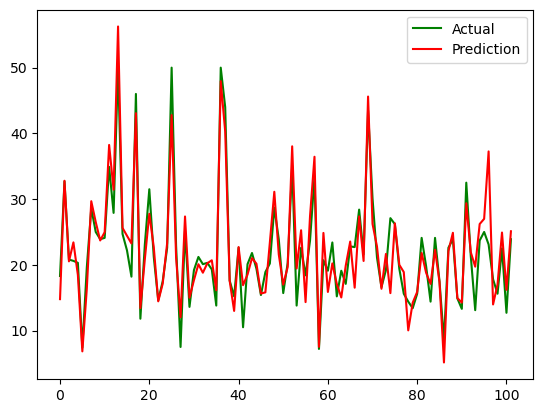

In [101]:
import matplotlib.pyplot as plt

plt.plot(result['Actual'], color='g', label='Actual')
plt.plot(result['Prediction'],color='r',label='Prediction')
plt.legend()
plt.show()

## Model 2

In [108]:
nn = keras.Sequential()
nn.add(layers.Dense(32, activation='sigmoid', input_shape=(X.shape[1],)))
nn.add(layers.Dense(1, activation='linear')) 

nn.summary()

C:\Users\Advait Shinde\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
nn.compile(optimizer='sgd',loss='mean_squared_error')

In [112]:
nn.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 374.7462 - val_loss: 41.4042
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41.3804 - val_loss: 32.4520
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28.4212 - val_loss: 29.5347
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.4562 - val_loss: 28.3582
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.0517 - val_loss: 27.6116
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.2967 - val_loss: 27.0111
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.4680 - val_loss: 26.5964
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.4592 - val_loss: 25.7944
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.3324 - val_loss: 25.9953
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27.4462 - val_loss: 25.4350
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.4384 - val_loss: 24.8605
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

In [114]:
preds = nn.predict(X_test).reshape(-1,)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [122]:

# Calculate R-squared (which can be interpreted as a measure of "goodness of fit")

from sklearn.metrics import r2_score

y_pred = nn.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-2: {r2}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
R-2: 0.7712974550273308


In [125]:
result = pd.DataFrame(
    {
        'Actual':y_test.values,
        'Prediction':preds
    }
)

result['Resuidual'] = abs(result['Actual']-result['Prediction'])

print (result['Resuidual'].sum()/len(result))

2.5539187487433943


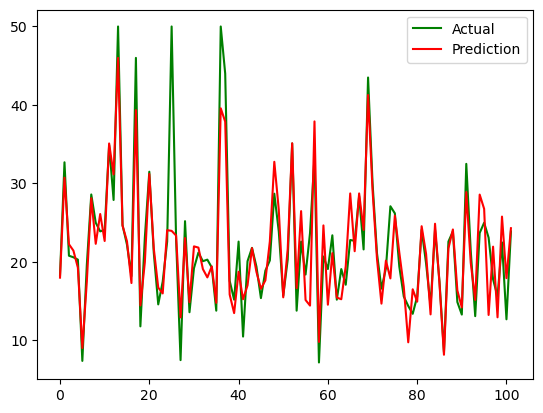

In [118]:
import matplotlib.pyplot as plt

plt.plot(result['Actual'], color='g', label='Actual')
plt.plot(result['Prediction'],color='r',label='Prediction')
plt.legend()
plt.show()

## Model 3

In [135]:
model3 = keras.Sequential()

model3.add(layers.Dense(128,activation  = 'relu', input_shape=(X.shape[1],)))
model3.add(layers.Dense(64,activation  = 'relu'))
model3.add(layers.Dense(32,activation  = 'relu'))
model3.add(layers.Dense(16,activation  = 'relu'))
model3.add(layers.Dense(1))

model3.summary()

C:\Users\Advait Shinde\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
model3.compile(optimizer='adam',loss='mean_squared_error')

model3.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=32)


Epoch 1/32
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 568.1749 - val_loss: 525.4606
Epoch 2/32
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 559.4064 - val_loss: 448.6089
Epoch 3/32
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 414.4582 - val_loss: 282.4488
Epoch 4/32
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 232.9181 - val_loss: 82.2540
Epoch 5/32
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 74.3854 - val_loss: 61.3865
Epoch 6/32
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.2483 - val_loss: 40.4697
Epoch 7/32
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.5580 - val_loss: 31.5316
Epoch 8/32
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.2888 - val_loss: 27.2889
Epoch 9/32
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.6692 - val_loss: 24.5049
Epoch 10/32
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.9995 - val_loss: 22.5072
Epoch 11/32
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.6131 - val_loss: 20.8661
Epoch 12/32
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6m

In [149]:
y_pred = model3.predict(X_test).reshape(-1,)

# The model is making predictions!
# R2 scores indicate how well the regression line fits the data, 1 being a perfect fit!
result = pd.DataFrame(
    {
        'Actual':y_test.values,
        'Prediction':y_pred
    }
)

result['Resuidual'] = abs(result['Actual']-result['Prediction'])

print (result['Resuidual'].sum()/len(result))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2.3222650565353096
R2 Score:  0.8533832241526972


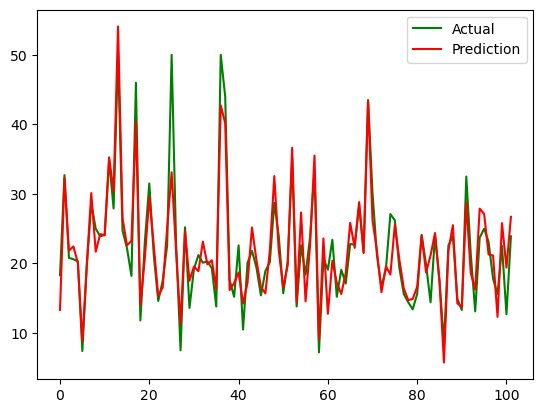

In [151]:
import matplotlib.pyplot as plt

plt.plot(result['Actual'], color='g', label='Actual')
plt.plot(result['Prediction'],color='r',label='Prediction')
plt.legend()
plt.show()